This script attempts to visualize the color of a reflected surface.

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pypvcell.transfer_matrix_optics import TMLayers,get_ntotal

from pypvcell.spectrum import Spectrum
from pypvcell.illumination import Illumination,load_astm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from colormath.color_conversions import convert_color
from colormath.color_objects import LabColor, LCHabColor, SpectralColor, sRGBColor, \
    XYZColor, LCHuvColor, IPTColor
import numpy as np
import matplotlib.pyplot as plt

from pypvcell.illumination import load_astm,load_blackbody

In [18]:
ILL_RANGE=np.arange(340,840,10)
def get_spec_input(spec_values)->dict:
    spec_x = [
        'spec_340nm', 'spec_350nm', 'spec_360nm', 'spec_370nm',
        'spec_380nm', 'spec_390nm', 'spec_400nm', 'spec_410nm',
        'spec_420nm', 'spec_430nm', 'spec_440nm', 'spec_450nm',
        'spec_460nm', 'spec_470nm', 'spec_480nm', 'spec_490nm',
        'spec_500nm', 'spec_510nm', 'spec_520nm', 'spec_530nm',
        'spec_540nm', 'spec_550nm', 'spec_560nm', 'spec_570nm',
        'spec_580nm', 'spec_590nm', 'spec_600nm', 'spec_610nm',
        'spec_620nm', 'spec_630nm', 'spec_640nm', 'spec_650nm',
        'spec_660nm', 'spec_670nm', 'spec_680nm', 'spec_690nm',
        'spec_700nm', 'spec_710nm', 'spec_720nm', 'spec_730nm',
        'spec_740nm', 'spec_750nm', 'spec_760nm', 'spec_770nm',
        'spec_780nm', 'spec_790nm', 'spec_800nm', 'spec_810nm',
        'spec_820nm', 'spec_830nm'
    ]

    spec_dict={}
    for idx,val in enumerate(spec_values):
        spec_dict[spec_x[idx]]=val

    return spec_dict

def spec_to_srgb(spec_y):
    spec_dict=get_spec_input(spec_y)
    spc=SpectralColor(**spec_dict,illuminant="d65")
    srgb = convert_color(spc, sRGBColor)
    r,g,b=srgb.get_value_tuple()
    return r,g,b

def rgb_single_pixel(r,g,b):
    output = np.zeros((1, 1, 3))
    output[0, 0, :] = np.array([r, g, b])
    return output

REFERENCE_ILLUM_D65 = np.array((
    39.90,
    44.86,
    46.59,
    51.74,
    49.92,
    54.60,
    82.69,
    91.42,
    93.37,
    86.63,
    104.81,
    116.96,
    117.76,
    114.82,
    115.89,
    108.78,
    109.33,
    107.78,
    104.78,
    107.68,
    104.40,
    104.04,
    100.00,
    96.34,
    95.79,
    88.69,
    90.02,
    89.61,
    87.71,
    83.30,
    83.72,
    80.05,
    80.24,
    82.30,
    78.31,
    69.74,
    71.63,
    74.37,
    61.62,
    69.91,
    75.11,
    63.61,
    46.43,
    66.83,
    63.40,
    64.32,
    59.47,
    51.97,
    57.46,
    60.33
))

In [19]:
layers = ['Air', 'TiO2_2', 'SiO2_2']
thicknesses = [0, 110, 0]
tm_single_ar_layer = TMLayers(layers, thicknesses, wl_range=ILL_RANGE)

In [20]:
R,T=tm_single_ar_layer.get_RT_fast()

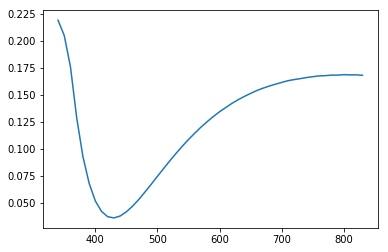

In [21]:
plt.plot(tm_single_ar_layer.wl_range,R)

In [22]:
ill=load_astm("AM1.5g")
x,y=ill.get_interp_spectrum(ILL_RANGE,to_x_unit='nm')

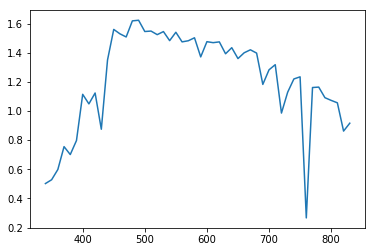

In [23]:
plt.plot(x,y)

In [24]:
reflected_ill=y*R

In [25]:
r,g,b=spec_to_srgb(reflected_ill)
output=rgb_single_pixel(r,g,b)

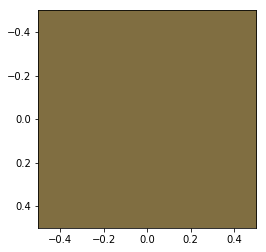

In [26]:
plt.imshow(output)

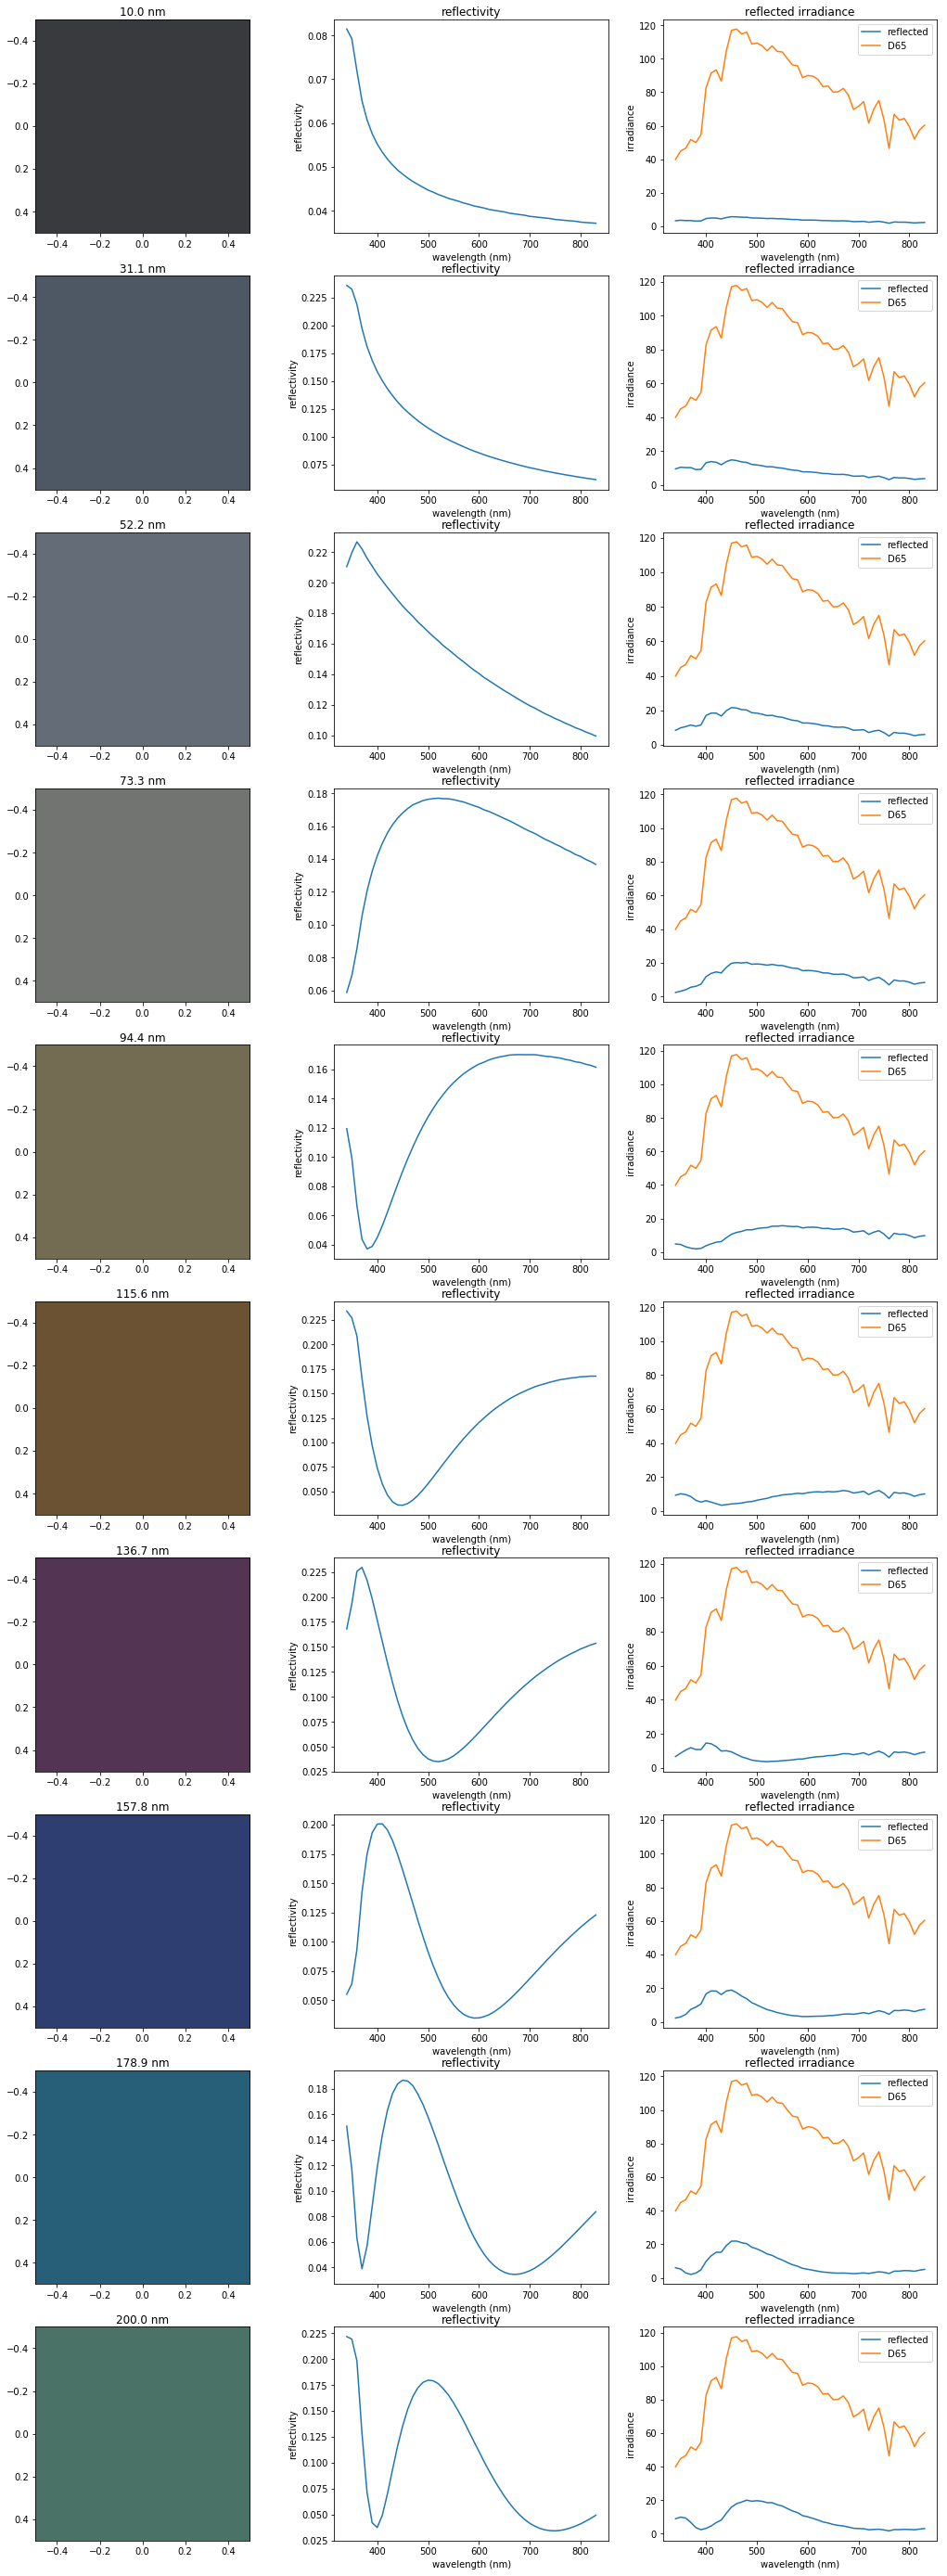

In [27]:
# thicknesses of SiO2
sio2_t=np.linspace(10,200,10)

fig_arrangement=(10,3)
fig,ax=plt.subplots(*fig_arrangement,figsize=(18,50))
for idx,tt in enumerate(sio2_t):
    tm_single_ar_layer.set_thickness([0, sio2_t[idx],50])
    R,T=tm_single_ar_layer.get_RT_fast()
    reflected_ill=REFERENCE_ILLUM_D65*R
    #reflected_ill=reflected_ill/reflected_ill[22]
    rgb=spec_to_srgb(R)
    ot=rgb_single_pixel(*rgb)
    ax[idx,0].imshow(ot)
    ax[idx,0].set_title("{:.1f} nm".format(sio2_t[idx]))
    ax[idx,1].plot(ILL_RANGE,R)
    ax[idx,1].set_xlabel("wavelength (nm)")
    ax[idx,1].set_ylabel("reflectivity")
    ax[idx,1].set_title("reflectivity")
    ax[idx,2].plot(ILL_RANGE,reflected_ill,label="reflected")
    ax[idx,2].plot(ILL_RANGE,REFERENCE_ILLUM_D65,label='D65')
    ax[idx,2].set_xlabel("wavelength (nm)")
    ax[idx,2].set_ylabel("irradiance")
    ax[idx,2].set_title("reflected irradiance")
    ax[idx,2].legend()
fig.savefig("color_ref.png")

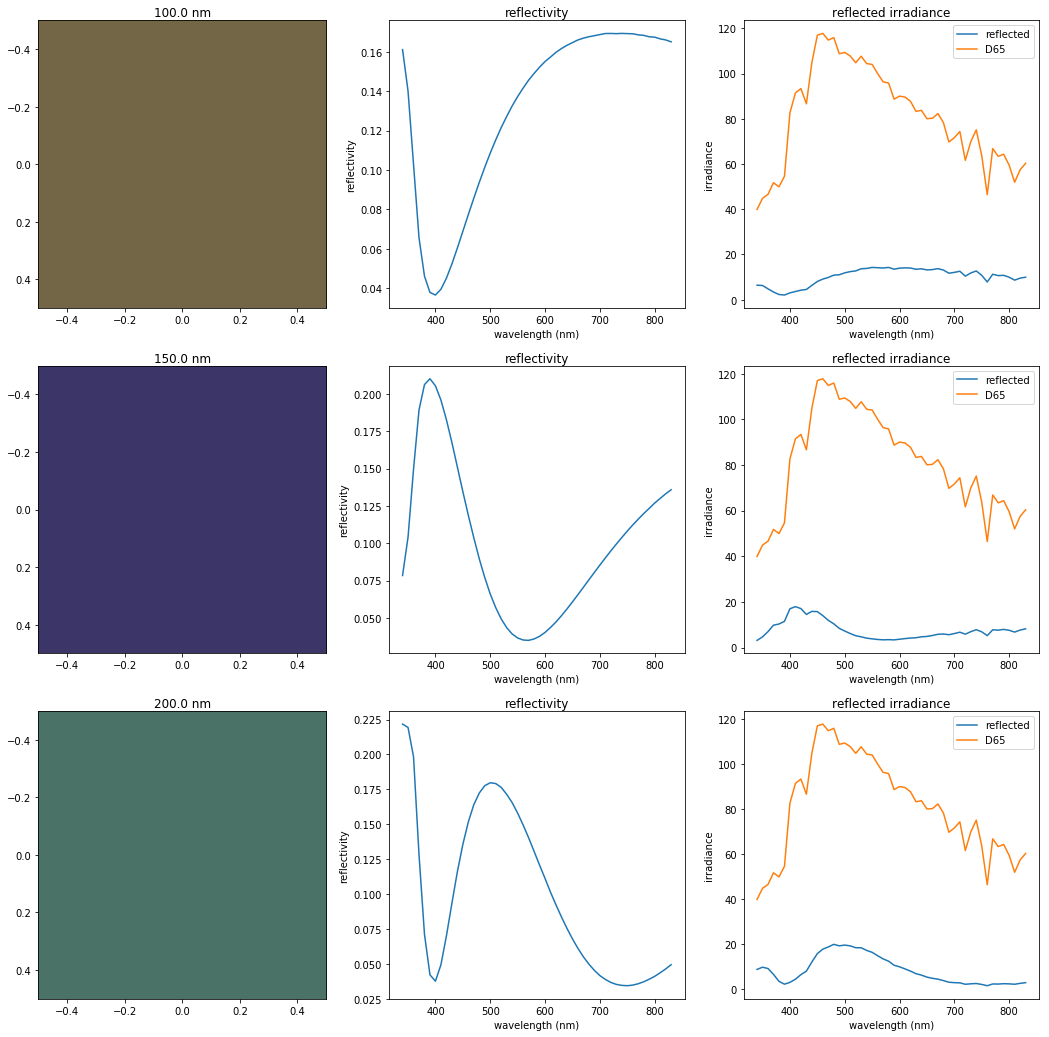

In [28]:
# thicknesses of SiO2
sio2_t=np.linspace(100,200,3)

fig_arrangement=(3,3)
fig,ax=plt.subplots(*fig_arrangement,figsize=(18,18))
for idx,tt in enumerate(sio2_t):
    tm_single_ar_layer.set_thickness([0, sio2_t[idx],50])
    R,T=tm_single_ar_layer.get_RT_fast()
    reflected_ill=REFERENCE_ILLUM_D65*R
    #reflected_ill=reflected_ill/reflected_ill[22]
    rgb=spec_to_srgb(R)
    ot=rgb_single_pixel(*rgb)
    ax[idx,0].imshow(ot)
    ax[idx,0].set_title("{:.1f} nm".format(sio2_t[idx]))
    ax[idx,1].plot(ILL_RANGE,R)
    ax[idx,1].set_xlabel("wavelength (nm)")
    ax[idx,1].set_ylabel("reflectivity")
    ax[idx,1].set_title("reflectivity")
    ax[idx,2].plot(ILL_RANGE,reflected_ill,label="reflected")
    ax[idx,2].plot(ILL_RANGE,REFERENCE_ILLUM_D65,label='D65')
    ax[idx,2].set_xlabel("wavelength (nm)")
    ax[idx,2].set_ylabel("irradiance")
    ax[idx,2].set_title("reflected irradiance")
    ax[idx,2].legend()
fig.savefig("color_ref.pdf")